In [230]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount("/content/drive")

In [231]:
df= pd.read_csv("/content/drive/My Drive/Ford Car Price Prediction.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0


In [232]:
df.shape

(17966, 9)

In [233]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


In [234]:
#There are 9 missing values in tax column.
print("Number of rows with null values in tax column:", df["tax"].isnull().sum())

subset = df[df["tax"].notnull()]

# Print out the shape of the subset
print("Shape after removing null values:", subset.shape)

Number of rows with null values in tax column: 9
Shape after removing null values: (17957, 9)


In [235]:
print("Shape of dataframe before dropping:", df.shape)
df = df.dropna(axis = 0, subset = ["tax"]) #Removing rows containing null values
print("Shape after dropping:", df.shape)

Shape of dataframe before dropping: (17966, 9)
Shape after dropping: (17957, 9)


In [236]:
dup = df[df.duplicated()]
print("Duplicate rows:\n",dup)

Duplicate rows:
                         model  year  price transmission  mileage fuelType  \
159                     Focus  2016  10995       Manual    30923   Diesel   
312                     Focus  2019  14998       Manual     7000   Petrol   
349                     Focus  2019  14998       Manual     7000   Petrol   
510                  EcoSport  2019  15489       Manual     5636   Diesel   
512     Grand Tourneo Connect  2019  19999       Manual     3500   Diesel   
...                       ...   ...    ...          ...      ...      ...   
14556                  Mondeo  2015   6793       Manual   138000   Diesel   
15121                    Kuga  2017  14999       Manual    24877   Diesel   
15127                EcoSport  2019  16799    Automatic      433   Petrol   
15685                      KA  2008   1795       Manual    63000   Petrol   
17608                   B-MAX  2017  11495    Automatic     5000   Petrol   

         tax   mpg  engineSize  
159      0.0  74.3       

In [237]:
print("Shape of dataframe before dropping:", df.shape)
df.drop_duplicates(inplace=True) #Removing duplicate rows
print("Shape after dropping:", df.shape)

Shape of dataframe before dropping: (17957, 9)
Shape after dropping: (17803, 9)


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17803 entries, 9 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17803 non-null  object 
 1   year          17803 non-null  int64  
 2   price         17803 non-null  int64  
 3   transmission  17803 non-null  object 
 4   mileage       17803 non-null  int64  
 5   fuelType      17803 non-null  object 
 6   tax           17803 non-null  float64
 7   mpg           17803 non-null  float64
 8   engineSize    17803 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


In [239]:
#Categorical Data
display(df["model"].unique())
display(df["transmission"].unique())
display(df["fuelType"].unique())

array([' Focus', ' Fiesta', ' EcoSport', ' Kuga', ' C-MAX', ' Mondeo',
       ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Puma', ' Grand C-MAX', ' KA', ' Galaxy',
       ' Mustang', ' Grand Tourneo Connect', ' Fusion', ' Ranger',
       ' Streetka', ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

array(['Manual', 'Semi-Auto', 'Automatic'], dtype=object)

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [240]:
#Categorical Encoding
df["model"] = df["model"].map({" Focus": 0," Fiesta": 1, " EcoSport":  2, " Kuga": 3, " Mondeo": 4, " Ka+": 5, " C-MAX": 6, " S-MAX": 7,
              " B-MAX": 8, " Edge": 9, " Tourneo Custom": 10, " Grand C-MAX": 11, " Tourneo Connect": 12,
							" Mustang": 13, " Grand Tourneo Connect": 14, " Galaxy": 15, " Ranger": 16, " Streetka": 17,
							" Escort": 18, " Fusion": 19, " Puma": 20, " KA": 21, " Transit Tourneo": 22, "Focus": 23 })

df["transmission"] = df["transmission"].map({"Manual": 0,"Semi-Auto": 1, "EcoSport": 2, "Automatic": 3})

df["fuelType"] = df["fuelType"].map({"Petrol": 0,"Diesel": 1, "Hybrid": 2, "Kuga": 3, "Electric": 4, "Other": 5})

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9,0,2018,10000,0,48141,0,145.0,61.4,1.0
10,1,2018,11561,0,18803,0,145.0,56.5,1.0
11,2,2018,13500,0,12065,0,145.0,54.3,1.0
12,1,2017,11000,0,20978,0,0.0,65.7,1.0
13,3,2018,17999,1,9002,1,145.0,54.3,2.0


In [241]:
#feature scaling
X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
12445,11,2016,0,19373,1,30.0,64.2,1.5
3334,1,2016,0,38744,0,0.0,65.7,1.0
9048,21,2016,0,27703,0,30.0,57.7,1.2
15712,1,2009,0,88733,0,150.0,49.6,1.4
11368,1,2017,0,24016,0,145.0,47.9,1.6
...,...,...,...,...,...,...,...,...
11416,6,2015,1,58979,1,125.0,58.9,2.0
12105,5,2017,0,14000,0,145.0,57.7,1.2
5427,1,2018,0,13363,0,145.0,55.4,1.1
877,1,2014,0,29123,0,30.0,54.3,1.2


In [242]:
#feature selection
df = df.drop("tax", axis=1)  #tax is redundant here because it's less important and can be calculated using other features.
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
9,0,2018,10000,0,48141,0,61.4,1.0
10,1,2018,11561,0,18803,0,56.5,1.0
11,2,2018,13500,0,12065,0,54.3,1.0
12,1,2017,11000,0,20978,0,65.7,1.0
13,3,2018,17999,1,9002,1,54.3,2.0


In [243]:
df.corr()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
model,1.000000,-0.115851,0.109404,0.089440,0.081174,0.208690,-0.222952,0.278302
year,-0.115851,1.000000,0.635650,0.039273,-0.708626,-0.085069,-0.021469,-0.137578
price,0.109404,0.635650,1.000000,0.244223,-0.530413,0.208125,-0.346036,0.411600
transmission,0.089440,0.039273,0.244223,1.000000,-0.057052,0.098658,-0.280661,0.202464
mileage,0.081174,-0.708626,-0.530413,-0.057052,1.000000,0.253150,0.117521,0.214637
fuelType,0.208690,-0.085069,0.208125,0.098658,0.253150,1.000000,0.306244,0.642549
mpg,-0.222952,-0.021469,-0.346036,-0.280661,0.117521,0.306244,1.000000,-0.262231
engineSize,0.278302,-0.137578,0.411600,0.202464,0.214637,0.642549,-0.262231,1.000000


<Axes: >

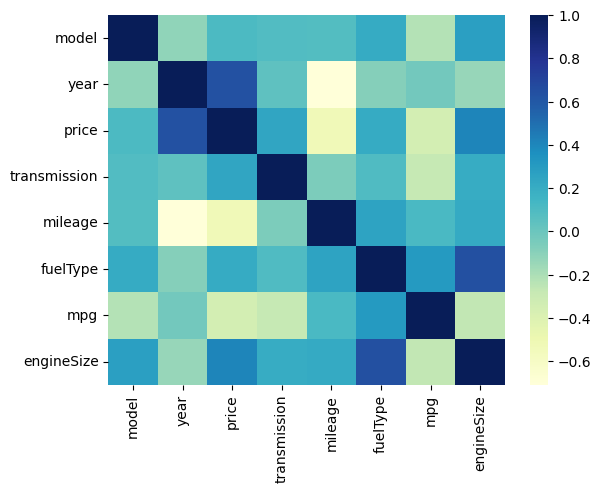

In [244]:
sns.heatmap(df.corr(), cmap = "YlGnBu")

In [245]:
#dropping year column because the correlation value is greater than 0.75 wrt price
df = df.drop("year", axis=1)
df

,model,price,transmission,mileage,fuelType,mpg,engineSize
9,0,10000,0,48141,0,61.4,1.0
10,1,11561,0,18803,0,56.5,1.0
11,2,13500,0,12065,0,54.3,1.0
12,1,11000,0,20978,0,65.7,1.0
13,3,17999,1,9002,1,54.3,2.0
...,...,...,...,...,...,...,...
17961,8,8999,0,16700,0,47.1,1.4
17962,8,7499,0,40700,0,57.7,1.0
17963,0,9999,0,7010,1,67.3,1.6
17964,21,8299,0,5007,0,57.7,1.2
